http://blog.yhat.com/tutorials/5-Feature-Engineering.html

In [3]:
# Import libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier

In [5]:
# Download and read cvs example from AWS.
df = pd.read_csv("https://rodeo-tutorials.s3.amazonaws.com/data/credit-data-trainingset.csv")
df.head(5)

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
4,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0


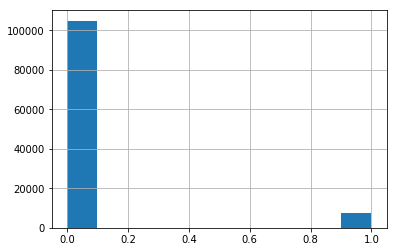

In [8]:
df['serious_dlqin2yrs'].hist()

In [6]:
# Set features.
features = np.array(['revolving_utilization_of_unsecured_lines',
                     'age', 'number_of_time30-59_days_past_due_not_worse',
                     'debt_ratio', 'monthly_income','number_of_open_credit_lines_and_loans', 
                     'number_of_times90_days_late', 'number_real_estate_loans_or_lines',
                     'number_of_time60-89_days_past_due_not_worse', 'number_of_dependents'])
# Build RF classifier.
clf = RandomForestClassifier()
clf.fit(df[features], df['serious_dlqin2yrs'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [9]:
# from the calculated importances, order them from most to least important
# and make a barplot so we can visualize what is/isn't important
importances = clf.feature_importances_
sorted_idx = np.argsort(importances)

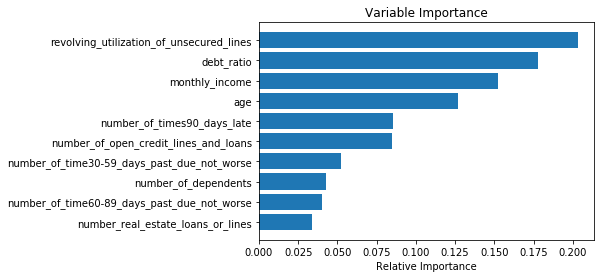

In [11]:
padding = np.arange(len(features)) + 0.5
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

In [172]:
# Bucketing Continuous Values
df['income_bins'] = pd.cut(df.monthly_income, bins=15)
pd.value_counts(df['income_bins'])
# not very usefull

(-3008.75, 200583.333]        112392
(200583.333, 401166.667]          11
(601750.0, 802333.333]             5
(401166.667, 601750.0]             4
(2808166.667, 3008750.0]           1
(1404083.333, 1604666.667]         1
(802333.333, 1002916.667]          1
(2607583.333, 2808166.667]         0
(2407000.0, 2607583.333]           0
(2206416.667, 2407000.0]           0
(2005833.333, 2206416.667]         0
(1805250.0, 2005833.333]           0
(1604666.667, 1805250.0]           0
(1203500.0, 1404083.333]           0
(1002916.667, 1203500.0]           0
Name: income_bins, dtype: int64

In [173]:
mi_max = df['monthly_income'].max()
mi_max

3008750.0

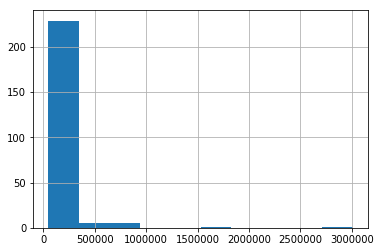

In [174]:
df['monthly_income'].hist(bins=10,range=[50000,mi_max])

### Bin monthly income into buckets

In [175]:
front = np.linspace(0, 10000, 9)
mid = np.delete(np.linspace(10000, 50000, 3), 0, 0)
tail = np.delete(np.linspace(50000, math.ceil(df['monthly_income'].max()), 3),0, 0)
bins = np.append(front, [mid, tail])
bins

array([0.000000e+00, 1.250000e+03, 2.500000e+03, 3.750000e+03,
       5.000000e+03, 6.250000e+03, 7.500000e+03, 8.750000e+03,
       1.000000e+04, 3.000000e+04, 5.000000e+04, 1.529375e+06,
       3.008750e+06])

In [176]:
df['income_bins'] = pd.cut(df.monthly_income, bins=bins, labels=False)
pd.value_counts(df.income_bins)

3.0     18679
2.0     16304
8.0     15175
4.0     15016
1.0     14474
5.0     11748
6.0      7924
7.0      7238
0.0      4041
9.0       363
10.0      224
11.0        2
Name: income_bins, dtype: int64

In [181]:
# Remove nulls :]
df['income_bins'].isnull().sum()
df['income_bins'] = df['income_bins'].fillna(-1)

0

### Inspecting the predictive value of your bins
 A quick and dirty way to see the effectiveness of derived bins is to inspect their distribution 
as it relates to the variable you're predicting. For us that means cross-tablulating it against serious_dlqin2yrs.

In [126]:
# In this case, it's very easy to see in the plot that serious_dlqin2yrs tends to be higher 
# where the income_bins are lower.

df[["income_bins", "serious_dlqin2yrs"]].groupby("income_bins").mean()

,serious_dlqin2yrs
income_bins,
0.0,0.063846
1.0,0.093754
2.0,0.085684
3.0,0.070025
4.0,0.066396
5.0,0.056265
6.0,0.053130
7.0,0.050152
8.0,0.043954


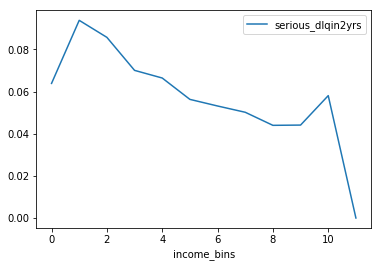

In [127]:
cols = ["income_bins", "serious_dlqin2yrs"]
df[cols].groupby("income_bins").mean().plot()

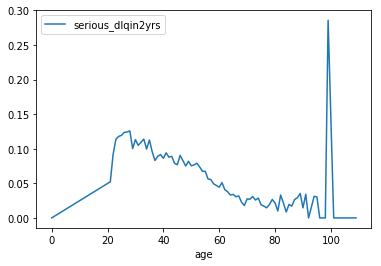

In [128]:
# continuous distributions
cols = ['age', 'serious_dlqin2yrs']
age_means = df[cols].groupby("age").mean()
age_means.plot()

In [129]:
# Bin age into buckets
mybins = [0] + list(range(20, 80, 5)) + [120]
df['age_bucket'] = pd.cut(df.age, bins=mybins)
df['age_bucket'].value_counts()

(45, 50]     14112
(50, 55]     13390
(55, 60]     12629
(60, 65]     12317
(40, 45]     12053
(35, 40]     10241
(65, 70]      8315
(30, 35]      8123
(75, 120]     7581
(25, 30]      5803
(70, 75]      5600
(20, 25]      2250
(0, 20]          0
Name: age_bucket, dtype: int64

In [130]:
# Using the age bins, calculate the percent of customers that were delinquent for each bucket
df[["age_bucket", "serious_dlqin2yrs"]].groupby("age_bucket").mean().fillna(0)

,serious_dlqin2yrs
age_bucket,
"(0, 20]",0.000000
"(20, 25]",0.109778
"(25, 30]",0.116319
"(30, 35]",0.108211
"(35, 40]",0.088956
"(40, 45]",0.085124
"(45, 50]",0.080995
"(50, 55]",0.072890
"(55, 60]",0.050598


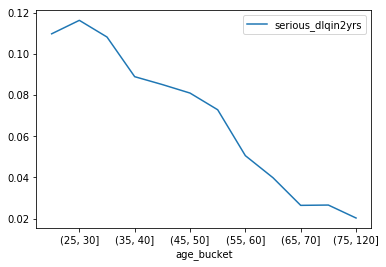

In [131]:
df[["age_bucket", "serious_dlqin2yrs"]].groupby("age_bucket").mean().plot()

### Factorize - turning categoricals into numericals
Use factorize to encode categorical data ("A", "B", "C", "A") into numerical data (0, 1, 2, 0).



In [132]:
labels, levels = pd.factorize(df.age_bucket)
df.age_bucket = labels
df.age_bucket.head()

0    0
1    1
2    1
3    2
4    3
Name: age_bucket, dtype: int64

### Write something that buckets debt_ratio into 4 (nearly) equally sized groups. 
Hint: use the quantile method for Series

In [133]:
bins = []

for q in [0.2, 0.4, 0.6, 0.8, 1.0]:
    bins.append(df.debt_ratio.quantile(q))

debt_ratio_binned = pd.cut(df.debt_ratio, bins=bins)
debt_ratio_binned
print(pd.value_counts(debt_ratio_binned))

(3.838, 307001.0]    22483
(0.467, 3.838]       22483
(0.287, 0.467]       22483
(0.134, 0.287]       22483
Name: debt_ratio, dtype: int64


### Scaling Features
Some algorithms will work better if your data is centered around 0. The StandardScaler module in scikit-learn makes it very easy to quickly scale columns in your data frame.


In [140]:
from sklearn.preprocessing import StandardScaler

df['monthly_income_scaled'] = StandardScaler().fit_transform(df.monthly_income.values.reshape(-1,1))

print(df.monthly_income_scaled.describe())
print("Mean at 0?", round(df.monthly_income_scaled.mean(), 10)==0)

count    1.124150e+05
mean    -1.213577e-17
std      1.000004e+00
min     -4.851543e-01
25%     -2.383750e-01
50%     -8.847657e-02
75%      1.251191e-01
max      2.290349e+02
Name: monthly_income_scaled, dtype: float64
Mean at 0? True


(array([2.2600e+03, 6.1960e+03, 7.2680e+03, 1.0217e+04, 1.1211e+04,
        1.2220e+04, 9.6550e+03, 1.0197e+04, 8.3450e+03, 5.6770e+03,
        5.5030e+03, 3.9290e+03, 4.5280e+03, 3.7960e+03, 1.8430e+03,
        1.9740e+03, 1.1090e+03, 1.2520e+03, 8.7700e+02, 4.9400e+02,
        5.0200e+02, 5.3400e+02, 3.6700e+02, 4.3600e+02, 1.5300e+02,
        2.7100e+02, 1.6500e+02, 1.2700e+02, 9.2000e+01, 7.1000e+01,
        6.4000e+01, 2.2900e+02, 5.7000e+01, 4.9000e+01, 1.6000e+01,
        4.3000e+01, 3.8000e+01, 6.5000e+01, 1.9000e+01, 2.7000e+01,
        2.7000e+01, 2.4000e+01, 2.0000e+01, 3.1000e+01, 1.6000e+01,
        1.3000e+01, 2.0000e+01, 7.0000e+00, 8.0000e+00]),
 array([-0.5       , -0.43877551, -0.37755102, -0.31632653, -0.25510204,
        -0.19387755, -0.13265306, -0.07142857, -0.01020408,  0.05102041,
         0.1122449 ,  0.17346939,  0.23469388,  0.29591837,  0.35714286,
         0.41836735,  0.47959184,  0.54081633,  0.60204082,  0.66326531,
         0.7244898 ,  0.78571429,  0.8

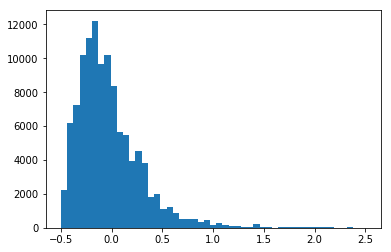

In [163]:
plt.hist(df.monthly_income_scaled, bins=np.linspace(-0.5,2.5,50))

### feature importance (again)
Let's redo our feature importance calculations to include the engineered features we just created.

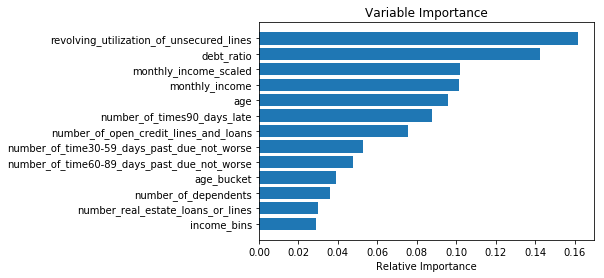

In [182]:
features = np.array(['revolving_utilization_of_unsecured_lines',
                     'age', 'number_of_time30-59_days_past_due_not_worse',
                     'debt_ratio', 'monthly_income','number_of_open_credit_lines_and_loans', 
                     'number_of_times90_days_late', 'number_real_estate_loans_or_lines',
                     'number_of_time60-89_days_past_due_not_worse', 'number_of_dependents',
                     'age_bucket', 'monthly_income_scaled', 'income_bins'])#, 

clf = RandomForestClassifier()
clf.fit(df[features], df['serious_dlqin2yrs'])

importances = clf.feature_importances_
sorted_idx = np.argsort(importances)

padding = np.arange(len(features)) + 0.5
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

In [183]:
best_features = features[sorted_idx][::-1]
pd.DataFrame({ "name": best_features })

,name
0,revolving_utilization_of_unsecured_lines
1,debt_ratio
2,monthly_income_scaled
3,monthly_income
4,age
5,number_of_times90_days_late
6,number_of_open_credit_lines_and_loans
7,number_of_time30-59_days_past_due_not_worse
8,number_of_time60-89_days_past_due_not_worse
9,age_bucket
